In [1]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

### Типы матриц

Вспомним про типы матриц из лекции:

1) m=n => квадратная, иначе прямоугольная

2) m = 1 => матрица-строка

3) n=1 => матрица-столбец

4) нулевая матрица, если все элементы = 0

5) диагональная (единичная)

6) треугольная(нижнетреугольная, верхнетреугольная)

7) ортогональная

Посмотрим на встроенные функции <b>numpy</b> для создания матриц с вышеперечисленными свойствами

1) Создаём матрицу нужной размерности

In [2]:
m0 = np.random.rand(3,2)
print(m0)

[[0.94054383 0.42575957]
 [0.92392363 0.54387681]
 [0.96806986 0.11163906]]


2) Создаём строку

In [3]:
m = np.random.rand(3)
print(m)

[0.98630359 0.69108223 0.39851332]


3) Создаём столбец

In [4]:
m = np.random.rand(1,3)
print(m.T)

[[0.50176759]
 [0.14168833]
 [0.74006783]]


4) Создаём нулевую матрицу

In [5]:
m1 = np.zeros((3,4))
print(m1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Можно создать нулевую матрицу размера уже существующей

In [6]:
m1 = np.zeros_like(m0)
print(m0)
print(m1)

[[0.94054383 0.42575957]
 [0.92392363 0.54387681]
 [0.96806986 0.11163906]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]


Создаём диагональную матрицу

In [7]:
m = np.diag([1,2,3])
print(m)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


Создаём единичную матрицу

In [8]:
m = np.ones((3,4))
print(m)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Можно создать нулевую матрицу размера уже существующей

In [9]:
m1 = np.ones_like(m0)
print(m0)
print(m1)

[[0.94054383 0.42575957]
 [0.92392363 0.54387681]
 [0.96806986 0.11163906]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


Также можно создать квадратную единичную матрицу следующей командой:

In [10]:
m = np.eye(3)
print(m)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Можно создавать нижнетреугольные (tril = triangle + lower)

In [41]:
m = np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
print(m)

[[ 0  0  0]
 [ 4  0  0]
 [ 7  8  0]
 [10 11 12]]


In [12]:
m = np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], 0)
print(m)

[[ 1  0  0]
 [ 4  5  0]
 [ 7  8  9]
 [10 11 12]]


а также верхнетреугольные (triu = triangle + upper)

In [13]:
m = np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
print(m)

[[ 1  2  3]
 [ 4  5  6]
 [ 0  8  9]
 [ 0  0 12]]


In [14]:
m = np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], 0)
print(m)

[[1 2 3]
 [0 5 6]
 [0 0 9]
 [0 0 0]]


Определитель матрицы

In [15]:
m = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 6]], dtype=np.float32)
det = np.linalg.det(m)
print(m)
print(det)

[[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 6.]]
-1.0


### Ранг матрицы

In [16]:
m = np.array([[1, 2, 3], [1, 1, 1], [2, 2, 2]])
r = np.linalg.matrix_rank(m)
print(m)
print(r)

[[1 2 3]
 [1 1 1]
 [2 2 2]]
2


### Собственные векторы и собственные значения

In [17]:
a = np.array([[-1, -6], [2, 6]])
w, v = np.linalg.eig(a)

In [18]:
print(a)

[[-1 -6]
 [ 2  6]]


In [19]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 2.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 3.0
соответствующий ему собственный вектор [ 0.83205029 -0.5547002 ]


### Спектральное разложение

In [20]:
m = np.array([[2, 0, 0], [0, 3, 4], [0, 4, 9]])
print(m)

[[2 0 0]
 [0 3 4]
 [0 4 9]]


In [21]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[11.  1.  2.]

Eigenvectors:
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [22]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[2. 0. 0.]
 [0. 3. 4.]
 [0. 4. 9.]]


### SVD разложение

In [23]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [24]:
X, y = load_digits(return_X_y=True)

In [25]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


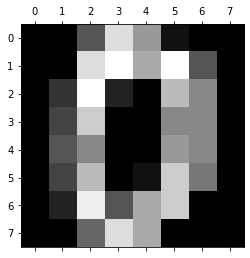

In [26]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [27]:
U, s, V = np.linalg.svd(image)
n_component = 3
S = np.diag(s)[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[0.00 -0.79 4.61 13.19 8.75 1.55 0.20 0.00]
 [0.00 1.83 15.30 13.86 11.18 12.21 4.59 0.00]
 [0.00 4.08 13.27 1.91 0.95 11.97 8.72 0.00]
 [0.00 3.69 10.62 0.65 -0.55 9.50 8.09 0.00]
 [0.00 3.41 9.39 0.15 -0.98 8.41 7.51 0.00]
 [0.00 3.55 11.82 -0.08 0.75 11.44 6.77 0.00]
 [0.00 1.15 13.03 5.53 9.41 13.22 0.14 0.00]
 [0.00 -0.87 4.74 13.74 9.19 1.59 0.07 0.00]]


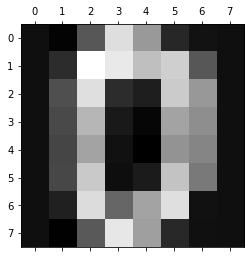

In [28]:
plt.matshow(A, cmap = 'gray')

In [29]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X, y)
rf_original.oob_score_

0.9716193656093489

In [30]:
svd = TruncatedSVD(n_components=16)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.8479585341506479

In [31]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9638286032276016

### Приближение матрицей меньшего ранга

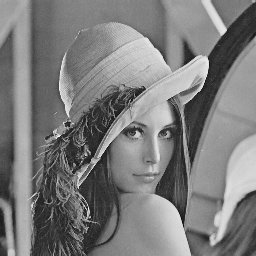

In [34]:
from PIL import Image
img = Image.open("data/lena.jpg")
arr = np.array(img.getdata())
img

In [35]:
print(arr.size)
print(arr.size ** 0.5)

65536
256.0


In [36]:
X = np.resize(arr, (256, 256))

In [37]:
U, d, Vt = linalg.svd(X)
D = linalg.diagsvd(d, X.shape[0], X.shape[1])

5


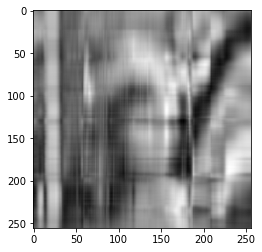

10


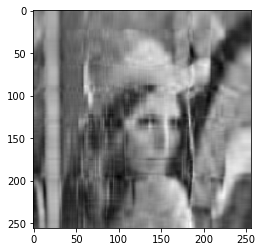

15


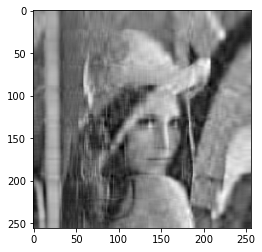

20


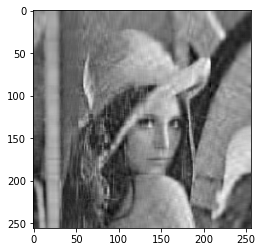

25


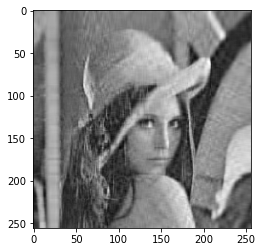

30


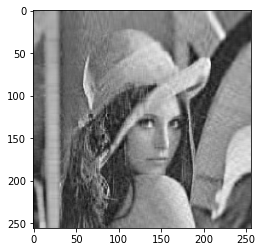

35


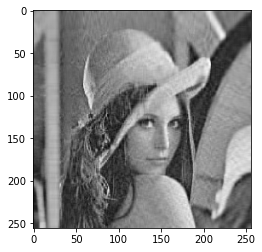

40


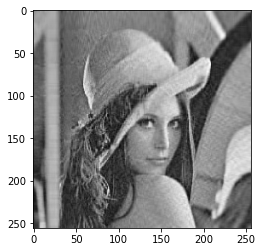

45


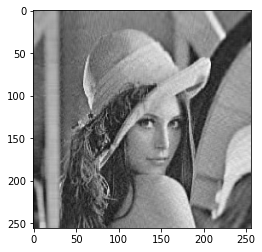

In [38]:
for k in range(5, 50, 5):
    D1 = D.copy()
    D1[D1 < d[int(k)]] = 0
    print (int(k))
    X1 = np.dot(np.dot(U, D1), Vt)
    pl.imshow(X1, cmap='gray')
    pl.show()